## CISC /CMPE 251 Assignment 4 Part 1: Theoretical 
Lauren Steel - 20218337 

November 25 2024 

Q3: Determining Decision Boundaries in SVC

In [ ]:
import numpy as np
from sklearn.svm import SVC

# dataset
X = np.array([[2, 2], [1, 1], [1, 4], [3, 1]])  
y = np.array([1, 1, -1, -1])

# train linear model
svm = SVC(kernel='linear', C=1e10)  
svm.fit(X, y)

# extract weights and bias
w = svm.coef_[0]  
b = svm.intercept_[0] 

# print results 
print("Weights (w):", w)
print("Bias (b):", b)
print(f"Decision boundary equation: {w[0]:.2f}x1 + {w[1]:.2f}x2 + ({b:.2f}) = 0")


Weights (w): [-5.99800206 -3.99900103]
Bias (b): 20.99367319690593
Decision boundary equation: -6.00x1 + -4.00x2 + (20.99) = 0


In [ ]:
import numpy as np
from sklearn.svm import SVC

# dataset
X = np.array([[2, 2], [1, 1], [1, 4], [3, 1]])  
y = np.array([1, 1, -1, -1])  

# train linear model
svm = SVC(kernel='linear', C=1e10)  
svm.fit(X, y)

# extract weights and bias
w = svm.coef_[0] 
b = svm.intercept_[0]  

# verify the margin condition 
margin_values = y * (np.dot(X, w) + b)

tolerance = 1e-6  
# print verification results 
print("\nVerification Results with Tolerance:")
for i, (point, margin) in enumerate(zip(X, margin_values)):
    satisfies = margin >= (1 - tolerance) 
    print(f"Point {i+1} ({point}): Margin value = {margin:.6f}, "
          f"{'Satisfies' if satisfies else 'Does not satisfy'} the margin condition.")



Verification Results with Tolerance:
Point 1 ([2 2]): Margin value = 0.999667, Does not satisfy the margin condition.
Point 2 ([1 1]): Margin value = 10.996670, Satisfies the margin condition.
Point 3 ([1 4]): Margin value = 1.000333, Satisfies the margin condition.
Point 4 ([3 1]): Margin value = 0.999334, Does not satisfy the margin condition.


## CISC /CMPE 251 Assignment 4 Part 2: Practical

## Part 1: Support vector regressor using scikit-learn
- Import the correct packages and functions
- Split the data into 75% training data and 25% testing data. Set random state=123
- Initialize and fit a linear support vector regressor with epsilon=0.2
- Initialize and fit a polynomial support vector regressor with epsilon=0.2, C=0.5, and gamma=0.7
- Initialize and fit an RBF support vector regressor with epsilon=0.2, C=0.5, and gamma=0.7
- Print the coefficient of determination of prediction for each support vector regressor using the score() method

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# dataset
file_path = "mpg.csv"  # Update the path if necessary
data = pd.read_csv(file_path)

# drop missing 
data = data.dropna()

# select the weight feature and mpg as the target
X = data[['weight']].values
y = data['mpg'].values

# scale
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# train linear model
linear_svr = SVR(kernel='linear', epsilon=0.2)
linear_svr.fit(X_train, y_train)
linear_score = linear_svr.score(X_test, y_test)

# train polynomial model
poly_svr = SVR(kernel='poly', epsilon=0.2, C=0.5, gamma=0.7)
poly_svr.fit(X_train, y_train)
poly_score = poly_svr.score(X_test, y_test)

# train RBF model
rbf_svr = SVR(kernel='rbf', epsilon=0.2, C=0.5, gamma=0.7)
rbf_svr.fit(X_train, y_train)
rbf_score = rbf_svr.score(X_test, y_test)

# print results
print(f"Linear model: {linear_score:.4f}")
print(f"Polynomial model: {poly_score:.4f}")
print(f"RBF model: {rbf_score:.4f}")


Linear model: 0.6806
Polynomial model: 0.3710
RBF model: 0.7083


## Part 2: Cross-validation for selection hyperparameters

- Create dataframe X with the features carat and depth
- Create dataframe y with the feature price
- Split the data into 80% training and 20% testing sets, with random state = 42
- Initialize an elastic net model with random state = 0
- Create a tuning grid with the hyperparameter name alpha and the values 0.1, 0.5, 0.9, 1.0
- Use GridSearchCV() with cv=10 to initialize and fit a tuning grid to the training data
- Print the mean testing score for each fold and the best parameter value

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, r2_score

# dataset
file_path = "diamonds.csv"
diamonds_data = pd.read_csv(file_path)

# implement dataframe X and y
X = diamonds_data[['carat', 'depth']]
y = diamonds_data['price']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize ElasticNet model 
elastic_net_model = ElasticNet(random_state=0)

# implement tuning grid 
param_grid = {'alpha': [0.1, 0.5, 0.9, 1.0]}

# gridSearchCV to fit the model 
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, scoring=make_scorer(r2_score), cv=10, verbose=1)
grid_search.fit(X_train, y_train)

# extract mean testing scores & best parameter value
mean_test_scores = grid_search.cv_results_['mean_test_score']
best_estimator = grid_search.best_estimator_

# print mean testing scores & best parameter value
print(f"Mean testing scores: {mean_test_scores}")
print(f"Best estimator: {best_estimator}")


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Mean testing scores: [0.82224591 0.61369963 0.47103892 0.444506  ]
Best estimator: ElasticNet(alpha=0.1, random_state=0)


## Part 3: Classification trees using scikit-learn

- Create a dataframe X containing the features cylinders, weight, and mpg
- Create a dataframe y containing the feature origin
- Initialize and fit a classification tree with max leaf nodes=6 to the training data
- Use the classification tree to make predictions for the test data
- Create a confusion matrix

|--- feature_0 <= 134.50
|   |--- feature_0 <= 97.25
|   |   |--- class: japan
|   |--- feature_0 >  97.25
|   |   |--- feature_1 <= 2757.50
|   |   |   |--- class: usa
|   |   |--- feature_1 >  2757.50
|   |   |   |--- class: europe
|--- feature_0 >  134.50
|   |--- feature_0 <= 190.50
|   |   |--- feature_1 <= 3097.50
|   |   |   |--- class: usa
|   |   |--- feature_1 >  3097.50
|   |   |   |--- class: europe
|   |--- feature_0 >  190.50
|   |   |--- class: usa



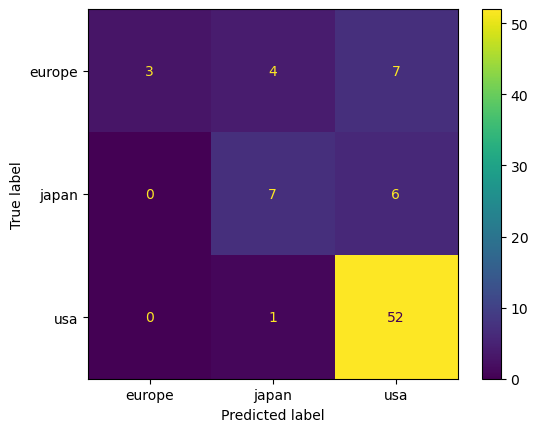

In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# dataset
file_path = "mpg.csv"  
mpg_data = pd.read_csv(file_path)

# implement dataframe X and y
X = mpg_data[['displacement', 'weight', 'mpg']]
y = mpg_data['origin']

# rename features 
X.columns = [f"feature_{i}" for i in range(X.shape[1])]

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I=initialize classification tree 
clf = DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)

# Fit classification tree to the training data
clf.fit(X_train, y_train)

# print tree 
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

# prediction tests
y_pred = clf.predict(X_test)

# display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_)
disp.plot()
plt.show()

